In [1]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                                                                
from astropy.io.ascii import read
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from matplotlib import rc
from astroML.plotting.tools import draw_ellipse

In [2]:
data = read('galaxies.cat') 
X = np.vstack([data['col2'],data['col3']]).T

In [3]:
N = np.arange(1, 11) 

0
1
2
3
4
5
6
7
8
9


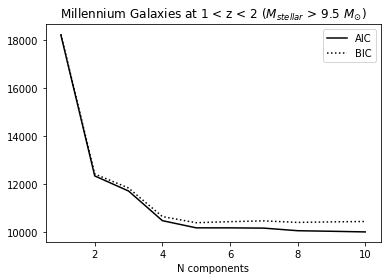

In [8]:
def compute_GMM(N, covariance_type='full', n_iter=1000):
	models = [None for n in N]
	for i in range(len(N)):
		print(i)
		models[i] = GaussianMixture(n_components=N[i], max_iter=n_iter,covariance_type=covariance_type)
		models[i].fit(X)
	return models

models = compute_GMM(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.plot(N, AIC, '-k', label='AIC')
plt.plot(N, BIC, ':k', label='BIC')
plt.legend(loc=1)
plt.xlabel('N components')
plt.title('Millennium Galaxies at 1 < z < 2 ($M_{stellar}$ > 9.5 $M_{\odot}$)')
plt.show()

In [19]:
fig, ax = plt.subplots(2,5, figsize=(30, 13))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax = ax.ravel()

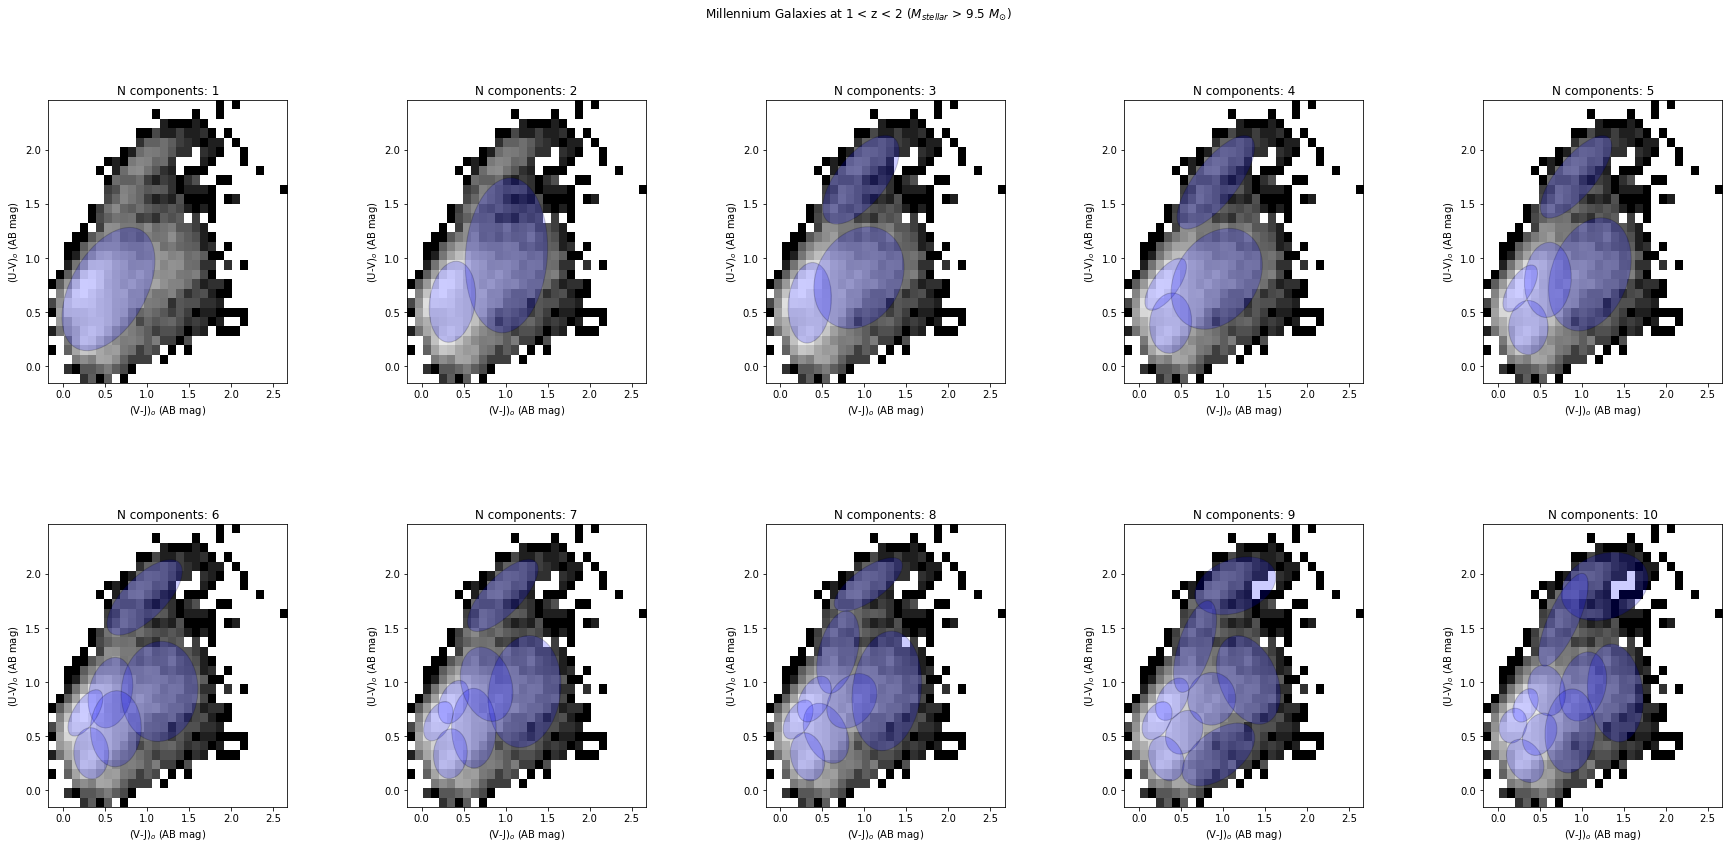

In [20]:
for i in range(len(N)):
    gmm_best = models[i]
    ax[i].hist2d(X[:,0], X[:,1],bins=30, norm=LogNorm(), cmap=plt.cm.binary_r)
    ax[i].set_title('N components: '+str(i+1))
    ax[i].set_ylabel('(U-V)$_o$ (AB mag)')
    ax[i].set_xlabel('(V-J)$_o$ (AB mag)')
    fig.suptitle('Millennium Galaxies at 1 < z < 2 ($M_{stellar}$ > 9.5 $M_{\odot}$)')
    rc('xtick', labelsize=10) 
    rc('ytick', labelsize=10) 
    for mu, C, w in zip(gmm_best.means_, gmm_best.covariances_, gmm_best.weights_):
        draw_ellipse(mu, C, scales=[1.5], ax=ax[i], fc='blue', ec='k', alpha=0.2)
        
plt.show()